In [81]:
import numpy as np

class LR:
    def __init__(self, learn_rate=0.01, no_of_iterations=400):
        self.no_of_iterations = no_of_iterations
        self.learn_rate = learn_rate
        self.weights = None
        self.bias = None 

    def fit(self, X, y):
        self.no_of_samples, self.no_of_features = X.shape
        self.weights = np.zeros(self.no_of_features)
        self.bias = 0

        total_loss = 1e-5
        prev_loss = 0

        for i in range(self.no_of_iterations):
            self.update_weights(X, y)
            self.y_pred = self.predict(X)
            current_loss = np.mean((self.y_pred - y) ** 2)
            
            if i > 0 and not np.isnan(current_loss) and abs(current_loss - prev_loss) < total_loss:
                break


            prev_loss = current_loss

    def update_weights(self, X, y):
        y_pred = self.predict(X)

        # Calculating gradients 
        dw = (1/self.no_of_samples) * (np.dot(X.T, (y_pred - y)))
        db = (1/self.no_of_samples) * (np.sum(y_pred - y))

        self.weights = self.weights - (self.learn_rate * dw)
        self.bias = self.bias - (self.learn_rate * db)

    def predict(self, X):
        return X.dot(self.weights) + self.bias

    

    

    
    
    


def standardize_1d(X):
    total_sum = sum(X)
    mean = total_sum / len(X)
    diff = [(i - mean) ** 2 for i in X]
    variance = sum(diff) / len(X)
    standard_deviation = variance ** 0.5

    std = [(i - mean) / standard_deviation for i in X]
    return std

def standardized(X):
    num_samples = len(X)
    num_features = len(X[0])

    means = [0] * num_features
    std_devs = [0] * num_features

    for j in range(num_features):
        feature_sum = sum(X[i][j] for i in range(num_samples))
        means[j] = feature_sum / num_samples

    for j in range(num_features):
        variance_sum = sum((X[i][j] - means[j]) ** 2 for i in range(num_samples))
        variance = variance_sum / num_samples
        std_devs[j] = variance ** 0.5

    std_devs = [1 if sd == 0 else sd for sd in std_devs]

    standardized_data = [
        [(X[i][j] - means[j]) / std_devs[j] for j in range(num_features)]
        for i in range(num_samples)
    ]

    return standardized_data


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

In [44]:
salary_data = pd.read_csv('salary_data.csv')

In [45]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [46]:
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

In [73]:
X_train , X_test, Y_train , Y_test = train_test_split(X,Y,test_size=0.4,random_state=42)

In [74]:
model = LR(learn_rate=0.01,no_of_iterations=1500)

In [75]:
model.fit(X_train,Y_train)

In [76]:
print("Weights:",model.weights[0])
print("Bias:",model.bias)

Weights: 9440.523535372186
Bias: 25784.448047916267


In [77]:
test_data_pred = model.predict(X_test)

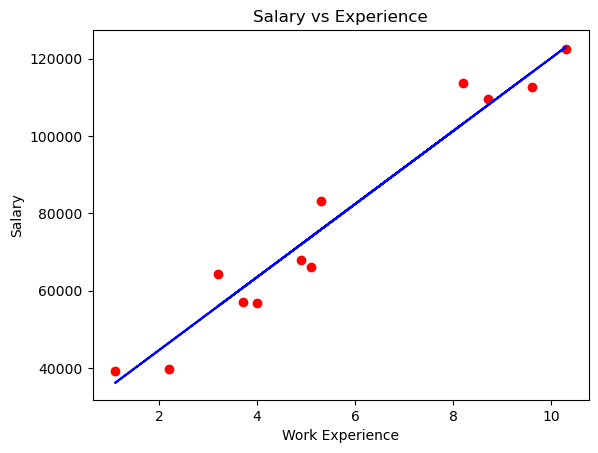

In [78]:
plt.scatter( X_test, Y_test, color = 'red' )
plt.plot( X_test, test_data_pred, color = 'blue' )    
plt.xlabel( 'Work Experience' )
plt.ylabel( 'Salary' )
plt.title( 'Salary vs Experience' )
plt.show()

In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


mae = mean_absolute_error(Y_test, test_data_pred)
print(f"Mean Absolute Error (MAE): {mae}")


mse = mean_squared_error(Y_test, test_data_pred)
print(f"Mean Squared Error (MSE): {mse}")


rmse = mean_squared_error(Y_test, test_data_pred, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")


r2 = r2_score(Y_test, test_data_pred)
print(f"R-squared (R^2): {r2}")


Mean Absolute Error (MAE): 5351.404926356885
Mean Squared Error (MSE): 36959378.81844153
Root Mean Squared Error (RMSE): 6079.422572781195
R-squared (R^2): 0.9543552339809639


C:\Users\anask\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
